<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

## **Наука про дані в роздрібній торгівлі. Підготовка даних та базовий статистичний аналіз**

Орієнтовний час, необхідний для виконання: **45** хвилин 

## Анотація

Ця лабораторна робота присвячена завантаженню, попередній підготовці та базовому статистичному аналізу у сфері роздрібної торгівлі на основі даних про світові ціни на продукти харчування, отримані з сайту Всесвітньої продовольчої програми, що охоплюють такі продукти, як кукурудза, рис, боби, риба та цукор, для 76 країн та близько 1500 ринків.

## Вступ

Основна проблема, яку потрібно вирішити в цій лабораторній роботі - це завантаження, попередня підготовка та статистичний аналіз, включаючи візуалізацію набору даних.

Основна складність статистичного аналізу реальних даних полягає у тому, що вони готуються чи представляються у формі, не зручній для методів машинного навчання. Дуже часто реальні дані представляють собою є змішану інформацію, представлену в різних масштабах. Тому ці дані мають бути знайдені та перемасштабовані чи перераховані. У цій лабораторній роботі показані методи автоматичної попередньої підготовки реальних даних. Наступна проблема — уміння грамотно маніпулювати та перетворювати великі дані, щоб отримати зручний статистичний звіт як у табличному вигляді, так і у вигляді графіків.

## Матеріали та методи

У цій лабораторній роботі ми навчимося завантажувати заздалегідь підготовлені дані, виконувати базовий статистичний аналіз та візуалізувати дані.
Ця лабораторна робота складається з наступних кроків:
* Завантаження даних - завантаження та відображення даних із файлу
* Попередня підготовка даних - попередній аналіз структури даних, зміна структури даних та таблиць
* Статистичний аналіз - базовий статистичний аналіз
* Візуалізація даних - виведення різних даних на графіках
* Побудова лінії тренду - базовий метод побудови ліній тренду та прогнозу на його основі

Статистичні дані були отримані з https://www.kaggle.com/lasaljaywardena/global-food-prices-dataset. Цей набір даних має ліцензію CC BY-IGO, що дозволяє безкоштовне використання як у некомерційних, так і в комерційних цілях.

## Попередні вимоги
* [Python](https://www.python.org) — базовий рівень
* [Pandas](https://pandas.pydata.org)— базовий рівень 
* Statistics — базовий рівень

## Цілі

Після виконання цієї лабораторної роботи ви зможете:

* Завантажувати набір даних із файлів *.csv
* Проводити базовий аналіз даних
* Створювати нові та перераховувати значення існуючих стовпців
* Перетворити таблицю
* Візуалізувати дані за допомогою pandas та matplotlib
* Оцінювати
  * Мінімальне та максимальне значення
  * Середнє
  * Квартілі
* Будувати зведені таблиці

## Імпортування бібліотек/Означення допоміжних функцій

**Запуск поза Skills Network Labs** . Цей файл був протестований у Skills Network Labs. Запуск в іншому середовищі також можливий, але не гарантується і може вимагати іншої процедури налаштування.

Повинні бути встановлені бібліотеки Pandas, MatplotLib та SeaBorn.

In [209]:
# conda install -c conda-forge pandas

In [210]:
# conda install -c conda-forgematplotlib

In [211]:
# conda install -c conda-forge seaborn 

## Завантаження даних із файлу *.csv

Спочатку треба імпортувати необхідні бібліотеки.

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Давайте спочатку відключимо попередження за допомогою **[warnings.filterwarnings()](https://docs.python.org/3/library/warnings.html)**

In [213]:
import warnings
warnings.filterwarnings('ignore')

Далі задамо значення параметра точності при виведенні на екран, що дорівнює 2, щоб відображалися два десяткові знаки (замість 6 за замовчуванням) за допомогою **[pandas.set_option()](https://pandas.pydata.org/docs/reference/api/pandas.set_option.html)** та **[pd.options.display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)**.

In [214]:
pd.options.display.float_format = '{:.2f}'.format

Наступним кроком буде завантаження файлу даних з репозиторію за допомогою **[read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)**

In [215]:
df = pd.read_csv('global_food_prices.csv')

Тепер давайте вивчимо наш набір даних.

In [216]:
df

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,1,2014,50.00,NaN
1,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,2,2014,50.00,NaN
2,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,3,2014,50.00,NaN
3,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,4,2014,50.00,NaN
4,1.00,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.00,AFN,15,Retail,5,KG,5,2014,50.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050633,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,432,Beans (sugar) - Retail,0.00,ZWL,15,Retail,5,KG,6,2021,233.33,NaN
2050634,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,539,Toothpaste - Retail,0.00,ZWL,15,Retail,116,100 ML,6,2021,112.50,NaN
2050635,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,540,Laundry soap - Retail,0.00,ZWL,15,Retail,5,KG,6,2021,114.00,NaN
2050636,271.00,Zimbabwe,3444,Midlands,5594,Mbilashaba,541,Handwash soap - Retail,0.00,ZWL,15,Retail,66,250 G,6,2021,59.50,NaN


In [217]:
print(df.columns)

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')


## Попередня підготовка даних

Вивчимо набір даних. Як бачите, він складається з 2050638 рядків × 18 стовпців. Також варто зазначити, що набір даних складається з різних типів інформації. Ми повинні бути впевнені, що Python правильно розпізнає ці типи. Для цього ми маємо використовувати **[pandas.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info)**.

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


In [219]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price,mp_commoditysource
count,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,2050638.00,0.00
mean,1004.06,26310.71,1591.21,220.12,0.00,14.92,14.87,6.36,2016.13,6413.98,NaN
std,7163.52,115952.88,1181.31,193.90,0.00,0.28,25.99,3.40,4.46,106977.23,NaN
min,1.00,0.00,80.00,50.00,0.00,14.00,5.00,1.00,1990.00,0.00,NaN
25%,105.00,1510.00,644.00,73.00,0.00,15.00,5.00,3.00,2014.00,45.00,NaN
50%,150.00,2156.00,1441.00,141.00,0.00,15.00,5.00,6.00,2017.00,246.56,NaN
75%,205.00,3433.00,2331.00,303.00,0.00,15.00,9.00,9.00,2020.00,1200.00,NaN
max,70001.00,900022.00,6083.00,893.00,0.00,18.00,175.00,12.00,2021.00,21777780.00,NaN


Дані включають країну, область, ринок, придбані товари, ціну та використану валюту, куплену кількість та місяць/рік покупки.

1. adm0_id: id країни
2. adm0_name: назва країни
3. adm1_id: id області
4. adm1_name: назва області
5. mkt_id: id ринку
6. mkt_name: назва ринку
7. cm_id: id закупленого товару
8. cm_name: закуплений товар
9. cur_id: id валюти
10. cur_name: назва валюти
11. pt_id: id типу ринку
12. pt_name: тип ринку (Роздрібний / Оптова торгівля / Виробник / Ферма)
13. um_id: id одиниць вимірювання
14. um_name: одиниця виміру товару
15. mp_month: місяць покупки
16. mpyear: рік покупки 
17. mpprice: заплачена вартість
18. mp_commoditysource: Джерело, що надає інформацію про ціни

Як бачите, набір даних складається з множини полів id. Це артефакт вилучення з бази даних. Ці поля не підходять для аналізу та мають бути виключені. Виберемо поля для аналізу

In [220]:
col = ['adm0_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name', 'um_name', 'mp_month', 'mp_year', 'mp_price']

І перетворимо набір даних:

In [221]:
df = df[col]
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050633,Zimbabwe,Mbilashaba,Beans (sugar) - Retail,ZWL,Retail,KG,6,2021,233.33
2050634,Zimbabwe,Mbilashaba,Toothpaste - Retail,ZWL,Retail,100 ML,6,2021,112.50
2050635,Zimbabwe,Mbilashaba,Laundry soap - Retail,ZWL,Retail,KG,6,2021,114.00
2050636,Zimbabwe,Mbilashaba,Handwash soap - Retail,ZWL,Retail,250 G,6,2021,59.50


In [222]:
df.mp_year.min()

np.int64(1990)

Давайте вивчимо інформацію стовпців набору даних.

Давайте створимо список країн у цьому наборі даних, використовуючи: **[pandas.Series.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)** та покажемо результати у вигляді таблиці **[pandas.Series.to_frame()](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)**

In [223]:
df['adm0_name'].value_counts().to_frame()

,count
adm0_name,
Rwanda,137746
Bassas da India,137093
Syrian Arab Republic,116588
Philippines,82099
Mali,73843
...,...
Viet Nam,275
Azerbaijan,125
Eritrea,100


Як бачите, набір данних містить інформацію про 98 країн. Найбільше інформації про ринки Руанди, Індії та Сирійської Арабської Республіки.

Аналогічно визначаємо перелік ринків в цьому наборі даних.

In [224]:
df['mkt_name'].value_counts().to_frame()

,count
mkt_name,
National Average,19748
Bogota,5798
Khujand,5270
Dushanbe,5270
Gharm,5241
...,...
Faya,2
Socogim,2
Vigwagwa,1


Як бачите, є інформація про 3235 ринків.

Давайте вивчимо типи куплених товарів: **[pandas.unique()](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)**. Для спрощення аналізу ці списки мають бути впорядковані за допомогою **[list.sort()](https://docs.python.org/3/howto/sorting.html)**

In [225]:
u = list(df['cm_name'].unique())
u.sort()
u

['Alcohol (spray) - Retail',
 'Anchovies - Retail',
 'Apples (dried) - Retail',
 'Apples (red) - Retail',
 'Apples (red) - Wholesale',
 'Apples - Retail',
 'Apples - Wholesale',
 'Avocados - Retail',
 'Avocados - Wholesale',
 'Bananas (imported) - Retail',
 'Bananas (lakatan) - Retail',
 'Bananas (latundan) - Retail',
 'Bananas (local) - Retail',
 'Bananas (medium size) - Retail',
 'Bananas (saba) - Retail',
 'Bananas - Retail',
 'Bananas - Wholesale',
 'Barley (mixed) - Wholesale',
 'Barley (white) - Wholesale',
 'Barley - Retail',
 'Barley - Wholesale',
 'Batteries (big) - Retail',
 'Batteries (small) - Retail',
 'Beans (black) - Retail',
 'Beans (black) - Wholesale',
 'Beans (black, Nayarit) - Wholesale',
 'Beans (black, Veracruz) - Wholesale',
 'Beans (black, Zacatecas) - Wholesale',
 'Beans (black, imported) - Wholesale',
 'Beans (butter) - Retail',
 'Beans (catarino) - Retail',
 'Beans (cranberry) - Retail',
 'Beans (cranberry) - Wholesale',
 'Beans (dry) - Retail',
 'Beans (dry)

Як можна бачити, є багато видів покупок. Більше того, значення "Обмінний курс" використовується як проста покупка. Давайте вивчимо ці рядки, використовуючи зріз набору даних та функцію **[pandas.Series.str.contains()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html )**

In [226]:
df[df['cm_name'].str.contains('Exchange rate')]

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
665,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,2,2014,57.55
666,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,7,2014,56.60
667,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,8,2014,56.62
668,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,9,2014,57.00
669,Afghanistan,Fayzabad,Exchange rate - Retail,AFN,Retail,USD/LCU,10,2014,57.38
...,...,...,...,...,...,...,...,...,...
1996823,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,1,2021,589.02
1996824,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,2,2021,592.54
1996825,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,3,2021,598.16
1996826,Yemen,Al Jabeen,Exchange rate (unofficial) - Retail,YER,Retail,USD/LCU,4,2021,593.24


Як ви можете бачити, ці рядки покупки складаєються з обмінного курсу для конкретного місяця та року для країн в одиницях місцевої валюти по відношенню до долара США. Ця ставка вказана у mp_price. Стовпець um_name містить скорочену назву валюти.

Також можна зазначити, що вартість покупок зазначається в одиницях місцевої валюти.

Це означає, що для порівняння ринкових цін різних країн ми маємо перерахувати стовпець mp_price у долари США. Це буде продемонстровано пізніше.

Давайте вивчимо, яка валюта використовується у різних країнах.

Для цього ми можемо використовувати **[pandas.crosstab()](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)**

In [227]:
pd.crosstab(df["adm0_name"],
            df["cur_name"],
            )

cur_name,AFN,AMD,AOA,ARS,AZN,BDT,BIF,BOB,BTN,BYR,...,UGX,USD,VEF,VND,XAF,XOF,YER,ZAR,ZMW,ZWL
adm0_name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,15427,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,1272,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Argentina,0,0,0,990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Armenia,0,20600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
Viet Nam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,275,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,36806,0,0,0


Як бачите, це представлення даних не є зручним для аналізу. Краще використовувати **[pandas.DataFrame.groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)**

In [228]:
(df[df['um_name']=='USD/LCU']).groupby('adm0_name')['cur_name'].first().to_frame()

,cur_name
adm0_name,
Afghanistan,AFN
Armenia,AMD
Chad,XAF
Democratic Republic of the Congo,CDF
Ethiopia,ETB
Iraq,IQD
Lebanon,LBP
Liberia,LRD
Libya,LYD


Повернемося до вивчення типів закупівлі. Як ви могли бачити вище, існує безліч різновидів подібних видів покупок. Зокрема:

In [229]:
df[df['cm_name'].str.contains('Bread')].groupby('cm_name')['cm_name'].first().values

array(['Bread (bakery) - Retail',
       'Bread (bakery, parallel market) - Retail',
       'Bread (brotchen) - Retail', 'Bread (brown) - Retail',
       'Bread (common) - Retail', 'Bread (first grade flour) - Retail',
       'Bread (high grade flour) - Retail', 'Bread (khoboz) - Retail',
       'Bread (pita) - Retail', 'Bread (rye) - Retail',
       'Bread (shop) - Retail', 'Bread (traditional) - Retail',
       'Bread (vetkoek) - Retail', 'Bread (wheat) - Retail',
       'Bread - Retail'], dtype=object)

Залишимо в наборі даних інформацію про товари базового споживчого кошика та курс валют

In [230]:
df = df[df['cm_name'].str.contains('Bread') | 
        df['cm_name'].str.contains('Milk') | 
        df['cm_name'].str.contains('Meat') | 
        df['cm_name'].str.contains('Fish') | 
        df['cm_name'].str.contains('Rice') |
        df['cm_name'].str.contains('Water') |
        df['cm_name'].str.contains('Exchange rate')]
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,12,2020,1187.50
2050626,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,2,2021,1123.33
2050627,Zimbabwe,Matibi,Fish (kapenta) - Retail,ZWL,Retail,KG,3,2021,1390.00
2050628,Zimbabwe,Mbilashaba,Rice - Retail,ZWL,Retail,KG,6,2021,110.62


Як бачите, кількість рядків зменшилася. Давайте дослідимо список видів покупок.

Замініть `##YOUR CODE GOES HERE##` на свій код Python.

In [231]:
u = list(df['cm_name'].unique())
u.sort()
u

['Bread (bakery) - Retail',
 'Bread (bakery, parallel market) - Retail',
 'Bread (brotchen) - Retail',
 'Bread (brown) - Retail',
 'Bread (common) - Retail',
 'Bread (first grade flour) - Retail',
 'Bread (high grade flour) - Retail',
 'Bread (khoboz) - Retail',
 'Bread (pita) - Retail',
 'Bread (rye) - Retail',
 'Bread (shop) - Retail',
 'Bread (traditional) - Retail',
 'Bread (vetkoek) - Retail',
 'Bread (wheat) - Retail',
 'Bread - Retail',
 'Exchange rate (unofficial) - Retail',
 'Exchange rate - Retail',
 'Fish (appolo) - Retail',
 'Fish (barbel, sole) - Retail',
 'Fish (bonga) - Retail',
 'Fish (canned) - Retail',
 'Fish (catfish) - Retail',
 'Fish (catfish) - Wholesale',
 'Fish (dry) - Retail',
 'Fish (dry) - Wholesale',
 'Fish (dry, katta) - Retail',
 'Fish (dry, katta) - Wholesale',
 'Fish (dry, sprats) - Retail',
 'Fish (dry, sprats) - Wholesale',
 'Fish (fresh) - Retail',
 'Fish (fresh) - Wholesale',
 'Fish (fresh, silvi) - Retail',
 'Fish (frigate tuna) - Retail',
 'Fish (f

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
u = list(df['cm_name'].unique())
u.sort()
u
    </code>
</details>

Згрупуємо покупки різних підтипів до однієї групи для подальшого аналізу. Для цього спочатку використайте **[lambda-function](https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/)** та зрізи для видалення з назви покупок видів ринків. Вони відокремлюються від назви покупок за допомогою символів "-". Далі відкидаємо підтипи покупок, які починаються із символів "("

In [232]:
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x)[:str(x).find(' -')] )
df.loc[:, 'cm_name'] = df['cm_name'].apply(lambda x : str(x) if str(x).find(' (') == -1 else str(x)[:str(x).find(' (')] )
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00
...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62


In [233]:
df['cm_name'].unique()

array(['Bread', 'Rice', 'Exchange rate', 'Milk', 'Meat', 'Fish',
       'Water spinach', 'Water', 'Watermelons'], dtype=object)

Як бачите, у нас лише дев'ять видів покупок, включаючи обмінний курс. Також у нас є додаткові покупки: "Water Spinach", "Watermelons". Вони залишилися, бо складаються зі слова «Water». Ми видалимо їх пізніше.

Дослідимо поле "Market name".

In [234]:
df['pt_name'].unique()

array(['Retail', 'Wholesale', 'Producer', 'Farm Gate'], dtype=object)

Як бачите, існує лише чотири типи ринків.

Перед аналізом ми повинні досліджувати одиниці виміру товару:

In [235]:
pd.crosstab(df["um_name"],
            df["cm_name"],
            )

cm_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water,Water spinach,Watermelons
um_name,,,,,,,,,
0.8 KG,0,0,0,0,552,0,0,0,0
1.1 KG,7913,0,0,0,0,0,0,0,0
1.2 KG,0,0,526,0,0,0,0,0,0
1.4 KG,0,0,0,0,0,1946,0,0,0
1.5 KG,0,0,472,0,0,0,0,0,0
1.5 L,0,0,0,0,0,0,825,0,0
1.8 KG,0,0,0,0,711,0,0,0,0
10 KG,0,0,0,364,0,108,0,0,0
100 KG,0,0,0,0,0,8604,0,0,0


Як бачите, у наборі даних є багато різних одиниць виміру. Для статистичної обробки потрібно розрахувати вартість конкретної покупки в еталонних одиницях. Для такого еталону виберемо 1 кг.
Для цього створимо словник ключів, що складається з ключа (тип одиниці) – вартість (коефіцієнт пропорційності до 1 кг). Курс обміну звичайно міняти не будемо - для цього використовуватимемо значення, що дорівнює 1 (останній рядок у словнику).

In [236]:
d = {'KG': 1,
 'Unit': 1,
 'Pound': 0.45,
 '400 G': 0.4,
 '150 G': 0.15,
 '5 pcs': 1,
 '500 G': 0.5,
 '700 G': 0.7,
 '800 G': 0.8,
 '1.1 KG': 1.1,
 'Libra': 0.45,
 '900 G': 0.9,
 '100 KG': 100,
 '46 KG': 46,
 'Cuartilla': 2.88,
 '90 KG': 90,
 '120 KG': 120,
 '50 KG': 50,
 'MT': 1000,
 '45 KG': 45,
 '84 KG': 84,
 '100 Pounds': 45,
 'Marmite': 1,
 '5 KG': 5,
 '10 KG': 10,
 '1.4 KG': 1.4,
 '25 KG': 25,
 '2 KG': 2,
 'Loaf' : 1,
 '50 Pounds': 22.5,
 '380 G': 0.38,
 '500 ML': 0.5,
 '385 G': 0.385,
 '0.8 KG': 0.8,
 '200 ML': 0.2,
 '20 G': 0.02,
 '1.8 KG': 1.8,
 '125 G': 0.125,
 '20 KG': 20,
 '170 G': 0.17,
 '185 G': 0.185,
 '200 G': 0.2,
 '1.5 KG': 1.5,
 '1.2 KG': 1.2,
 'Bundle': 46,
 '160 G': 0.16,
 'Cubic meter': 1,
 '1.5 L': 1.5,
 'L': 1,
 'USD/LCU': 1}

**[pandas.Series.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)** можна використовувати для **заміни значень у стовпці**, передавши його як словник аргументів у формі `{old_value: new_value}`.

Давайте застосуємо цей словник для розрахунку нового стовпця з коефіцієнтами. Потім використовуємо цю колонку для розрахунку ціни купівлі за 1 кг.

In [237]:
df['um_koef'] = df['um_name'].map(d)
df['mp_price_un'] = df['mp_price'] / df['um_koef']

In [238]:
df

,adm0_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,um_koef,mp_price_un
0,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,1,2014,50.00,1.00,50.00
1,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,2,2014,50.00,1.00,50.00
2,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,3,2014,50.00,1.00,50.00
3,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,4,2014,50.00,1.00,50.00
4,Afghanistan,Fayzabad,Bread,AFN,Retail,KG,5,2014,50.00,1.00,50.00
...,...,...,...,...,...,...,...,...,...,...,...
2050625,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,12,2020,1187.50,1.00,1187.50
2050626,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,2,2021,1123.33,1.00,1123.33
2050627,Zimbabwe,Matibi,Fish,ZWL,Retail,KG,3,2021,1390.00,1.00,1390.00
2050628,Zimbabwe,Mbilashaba,Rice,ZWL,Retail,KG,6,2021,110.62,1.00,110.62


Ми підготували набір даних для статистичного аналізу.

У цій лабораторній роботі ми проаналізуємо значення та динаміку цін покупок споживчого кошика у різних країнах.
Для цього ми повинні згрупувати рядки за країнами, роком, місяцем та ринками. Після цього треба перетворити таблицю, створивши нові окремі стовпці для кожного типу покупок кошика клієнтів.

Ми можемо зробити це за допомогою **[pivot_table()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table)**

In [239]:
df_res = pd.pivot_table(df, values= 'mp_price', index= ['adm0_name', 'mp_year', 'mp_month', 'mkt_name'], columns=['cm_name'], aggfunc='mean', margins=False)

In [240]:
df_res

cm_name                                               Bread  Exchange rate  \
adm0_name   mp_year mp_month mkt_name                                        
Afghanistan 2000    1        Hirat                    15.63            NaN   
                             Jalalabad                14.86            NaN   
                             Kabul                    14.26            NaN   
                             Kandahar                 16.25            NaN   
                    2        Hirat                    15.63            NaN   
...                                                     ...            ...   
Zimbabwe    2021    6        Sizinda Shopping Centre    NaN            NaN   
                             Torwood 1                  NaN            NaN   
                             Torwood 2                  NaN            NaN   
                             Victoria Falls             NaN            NaN   
                             Zvishavane Urban           NaN            NaN   

cm_name                                                 Fish  Meat  Milk  \
adm0_name   mp_year mp_month mkt_name                                      
Afghanistan 2000    1        Hirat                       NaN   NaN   NaN   
                             Jalalabad                   NaN   NaN   NaN   
                             Kabul                       NaN   NaN   NaN   
                             Kandahar                    NaN   NaN   NaN   
                    2        Hirat                       NaN   NaN   NaN   
...                                                      ...   ...   ...   
Zimbabwe    2021    6        Sizinda Shopping Centre     NaN   NaN   NaN   
                             Torwood 1               1000.00   NaN   NaN   
                             Torwood 2                   NaN   NaN   NaN   
                             Victoria Falls          1270.45   NaN   NaN   
                             Zvishavane Urban        1227.70   NaN   NaN   

cm_name                                                Rice  Water  \
adm0_name   mp_year mp_month mkt_name                                
Afghanistan 2000    1        Hirat                      NaN    NaN   
                             Jalalabad                  NaN    NaN   
                             Kabul                      NaN    NaN   
                             Kandahar                   NaN    NaN   
                    2        Hirat                      NaN    NaN   
...                                                     ...    ...   
Zimbabwe    2021    6        Sizinda Shopping Centre  82.50    NaN   
                             Torwood 1                85.00    NaN   
                             Torwood 2                85.00    NaN   
                             Victoria Falls          123.43    NaN   
                             Zvishavane Urban        152.44    NaN   

cm_name                                               Water spinach  \
adm0_name   mp_year mp_month mkt_name                                 
Afghanistan 2000    1        Hirat                              NaN   
                             Jalalabad                          NaN   
                             Kabul                              NaN   
                             Kandahar                           NaN   
                    2        Hirat                              NaN   
...                                                             ...   
Zimbabwe    2021    6        Sizinda Shopping Centre            NaN   
                             Torwood 1                          NaN   
                             Torwood 2                          NaN   
                             Victoria Falls                     NaN   
                             Zvishavane Urban                   NaN   

cm_name                                               Watermelons  
adm0_name   mp_year mp_month mkt_name                              
Afghanistan 2000    1    

Як бачите, новий набір даних складається з 170 510 рядків. 

Тепер ми можемо легко видалити стовпці: Water Spinach і Watermelons.

In [241]:
df_res.columns

Index(['Bread', 'Exchange rate', 'Fish', 'Meat', 'Milk', 'Rice', 'Water',
       'Water spinach', 'Watermelons'],
      dtype='object', name='cm_name')

In [242]:
df_res = df_res.drop(['Water spinach', 'Watermelons'], axis=1)
df_res

cm_name                                               Bread  Exchange rate  \
adm0_name   mp_year mp_month mkt_name                                        
Afghanistan 2000    1        Hirat                    15.63            NaN   
                             Jalalabad                14.86            NaN   
                             Kabul                    14.26            NaN   
                             Kandahar                 16.25            NaN   
                    2        Hirat                    15.63            NaN   
...                                                     ...            ...   
Zimbabwe    2021    6        Sizinda Shopping Centre    NaN            NaN   
                             Torwood 1                  NaN            NaN   
                             Torwood 2                  NaN            NaN   
                             Victoria Falls             NaN            NaN   
                             Zvishavane Urban           NaN            NaN   

cm_name                                                 Fish  Meat  Milk  \
adm0_name   mp_year mp_month mkt_name                                      
Afghanistan 2000    1        Hirat                       NaN   NaN   NaN   
                             Jalalabad                   NaN   NaN   NaN   
                             Kabul                       NaN   NaN   NaN   
                             Kandahar                    NaN   NaN   NaN   
                    2        Hirat                       NaN   NaN   NaN   
...                                                      ...   ...   ...   
Zimbabwe    2021    6        Sizinda Shopping Centre     NaN   NaN   NaN   
                             Torwood 1               1000.00   NaN   NaN   
                             Torwood 2                   NaN   NaN   NaN   
                             Victoria Falls          1270.45   NaN   NaN   
                             Zvishavane Urban        1227.70   NaN   NaN   

cm_name                                                Rice  Water  
adm0_name   mp_year mp_month mkt_name                               
Afghanistan 2000    1        Hirat                      NaN    NaN  
                             Jalalabad                  NaN    NaN  
                             Kabul                      NaN    NaN  
                             Kandahar                   NaN    NaN  
                    2        Hirat                      NaN    NaN  
...                                                     ...    ...  
Zimbabwe    2021    6        Sizinda Shopping Centre  82.50    NaN  
                             Torwood 1                85.00    NaN  
                             Torwood 2                85.00    NaN  
                             Victoria Falls          123.43    NaN  
                             Zvishavane Urban        152.44    NaN  

[170510 rows x 7 columns]

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
df_res = df_res[['Exchange rate', 'Bread', 'Fish', 'Meat', 'Milk', 'Rice', 'Water']]
df_res
    </code>
</details>

## Статистичний аналіз

### Основи статистичного аналізу

Як ви можете бачити, результуючий набір даних має зручну для аналізу структуру. Сгруповані стовпці представлені як індекси. Однак для статистичного аналізу ці стовпці необхідно перетворити на вигляд звичайних стовпців. Ми можемо зробити це за допомогою **[pandas.DataFrame.reset_index()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html)**

In [243]:
df_stat = df_res.reset_index()
df_stat

cm_name,adm0_name,mp_year,mp_month,mkt_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
0,Afghanistan,2000,1,Hirat,15.63,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2000,1,Jalalabad,14.86,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2000,1,Kabul,14.26,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2000,1,Kandahar,16.25,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2000,2,Hirat,15.63,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
170505,Zimbabwe,2021,6,Sizinda Shopping Centre,NaN,NaN,NaN,NaN,NaN,82.50,NaN
170506,Zimbabwe,2021,6,Torwood 1,NaN,NaN,1000.00,NaN,NaN,85.00,NaN
170507,Zimbabwe,2021,6,Torwood 2,NaN,NaN,NaN,NaN,NaN,85.00,NaN
170508,Zimbabwe,2021,6,Victoria Falls,NaN,NaN,1270.45,NaN,NaN,123.43,NaN


Давайте визначимо, скільки записів доступно для різних країн у цьому наборі даних у абсолютному та нормованому вигляді.

In [244]:
df_stat["adm0_name"].value_counts().to_frame()

,count
adm0_name,
Mali,11774
Bassas da India,10668
Niger,9858
Senegal,7541
Rwanda,5154
...,...
Sudan,91
Algeria,80
Argentina,62


In [245]:
df_stat["adm0_name"].value_counts(normalize=True).to_frame()

,proportion
adm0_name,
Mali,0.07
Bassas da India,0.06
Niger,0.06
Senegal,0.04
Rwanda,0.03
...,...
Sudan,0.00
Algeria,0.00
Argentina,0.00


Як бачите, нам доступна інформація про 93 країни. Також найбільшу кількість записів становлять Малі, Індія та Нігер.

Створимо список наявних країн:

In [246]:
countries = df['adm0_name'].unique()
countries

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay',
       'Peru'

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
df_stat["adm0_name"].unique()
    </code>
</details>

Давайте розрахуємо базову статистичну інформацію про покупки в Малі, використовуючи **[pandas.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html?highlight=describe#pandas.DataFrame.describe)**.

In [247]:
df_stat[df_stat['adm0_name']=='Mali'].describe()

cm_name,mp_year,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
count,11774.00,11774.00,0.00,0.00,359.00,573.00,590.00,11774.00,0.00
mean,2014.68,6.37,NaN,NaN,1916.26,2448.63,1660.77,348.58,NaN
std,4.47,3.41,NaN,NaN,597.71,411.04,369.07,62.28,NaN
min,2003.00,1.00,NaN,NaN,300.00,825.00,662.50,120.00,NaN
25%,2010.00,3.00,NaN,NaN,1500.00,2250.00,1500.00,316.33,NaN
50%,2016.00,6.00,NaN,NaN,1980.00,2333.33,1555.00,353.50,NaN
75%,2019.00,9.00,NaN,NaN,2250.00,2666.67,1750.00,375.00,NaN
max,2021.00,12.00,NaN,NaN,4050.00,3833.33,4700.00,820.00,NaN


У цій таблиці можна побачити консолідовану статистичну інформацію, таку як кількість непустих рядків, середнє значення, стандартне відхилення, максимум, мінімум і т.д.
Як бачите, хліб та вода не користуються популярністю в Індії.

Звичайно, ви можете розрахувати будь-який статистичний коефіцієнт, використовуючи **[statistics](https://docs.python.org/3/library/statistics.html)** або **[numpy](https://numpy.org )**

Давайте порахуємо те саме для України

In [248]:
df_stat[df_stat['adm0_name']=='Ukraine'].describe()

cm_name,mp_year,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
count,1165.00,1165.00,1165.00,0.00,0.00,1165.00,1165.00,1165.00,0.00
mean,2015.54,6.66,9.41,NaN,NaN,60.77,12.20,16.30,NaN
std,1.09,3.39,2.50,NaN,NaN,12.37,3.38,3.56,NaN
min,2014.00,1.00,4.39,NaN,NaN,34.90,6.81,7.76,NaN
25%,2015.00,4.00,7.54,NaN,NaN,52.44,9.20,15.16,NaN
50%,2016.00,7.00,10.00,NaN,NaN,60.80,11.64,16.65,NaN
75%,2016.00,10.00,11.03,NaN,NaN,66.44,14.88,18.29,NaN
max,2017.00,12.00,15.74,NaN,NaN,94.47,20.62,29.75,NaN


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
df_stat[df_stat['adm0_name']=='Ukraine'].describe()
    </code>
</details>

Як бачите, українці надають перевагу хлібу, натомість риба не є популярною.

Давайте дослідимо Китай

In [249]:
df_stat[df_stat['adm0_name']=='China'].describe()

cm_name,mp_year,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
count,410.00,410.00,0.00,0.00,0.00,0.00,0.00,410.00,0.00
mean,2016.93,6.38,NaN,NaN,NaN,NaN,NaN,4.38,NaN
std,1.97,3.41,NaN,NaN,NaN,NaN,NaN,0.39,NaN
min,2014.00,1.00,NaN,NaN,NaN,NaN,NaN,3.60,NaN
25%,2015.00,3.00,NaN,NaN,NaN,NaN,NaN,4.14,NaN
50%,2017.00,6.00,NaN,NaN,NaN,NaN,NaN,4.24,NaN
75%,2019.00,9.00,NaN,NaN,NaN,NaN,NaN,4.76,NaN
max,2020.00,12.00,NaN,NaN,NaN,NaN,NaN,5.80,NaN


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
df_stat[df_stat['adm0_name']=='China'].describe()
    </code>
</details>

Як бачите, Китай містить інформацію лише про рис.

А що на раххунок Індії?

In [250]:
df_stat[df_stat['adm0_name']=='Bassas da India'].describe()

cm_name,mp_year,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
count,10668.00,10668.00,0.00,0.00,0.00,0.00,6644.00,10647.00,0.00
mean,2012.04,6.40,NaN,NaN,NaN,NaN,41.10,108.24,NaN
std,7.44,3.44,NaN,NaN,NaN,NaN,9.01,290.73,NaN
min,1994.00,1.00,NaN,NaN,NaN,NaN,16.00,5.00,NaN
25%,2008.00,3.00,NaN,NaN,NaN,NaN,35.00,16.50,NaN
50%,2014.00,6.00,NaN,NaN,NaN,NaN,40.14,26.00,NaN
75%,2018.00,9.00,NaN,NaN,NaN,NaN,46.00,32.57,NaN
max,2021.00,12.00,NaN,NaN,NaN,NaN,75.00,2481.59,NaN


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
df_stat[df_stat['adm0_name']=='Bassas da India'].describe()
    </code>
</details>

Індія містить інформацію про рис і молоко.

Вивчимо динаміку закупівельних цін в Індії. Для цього ми повинні відфільтрувати дані та згрупувати їх за роками:

In [251]:
#d = df_stat[df_stat['adm0_name']=='Bassas da India'].groupby('mp_year').mean()
d = df_stat[df_stat['adm0_name'] == 'Bassas da India'].groupby('mp_year').mean(numeric_only=True)
d

cm_name,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
1994,6.90,NaN,NaN,NaN,NaN,NaN,7.82,NaN
1995,6.58,NaN,NaN,NaN,NaN,NaN,8.03,NaN
1996,6.58,NaN,NaN,NaN,NaN,NaN,9.05,NaN
1997,6.45,NaN,NaN,NaN,NaN,NaN,9.63,NaN
1998,6.41,NaN,NaN,NaN,NaN,NaN,10.12,NaN
1999,6.41,NaN,NaN,NaN,NaN,NaN,11.17,NaN
2000,6.51,NaN,NaN,NaN,NaN,NaN,122.81,NaN
2001,4.46,NaN,NaN,NaN,NaN,NaN,215.84,NaN
2002,6.52,NaN,NaN,NaN,NaN,NaN,114.06,NaN


### Візуалізація

Тепер ми можемо відобразити цю інформацію за допомогою **[pandas.DataFrame.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)**

<Axes: xlabel='mp_year'>

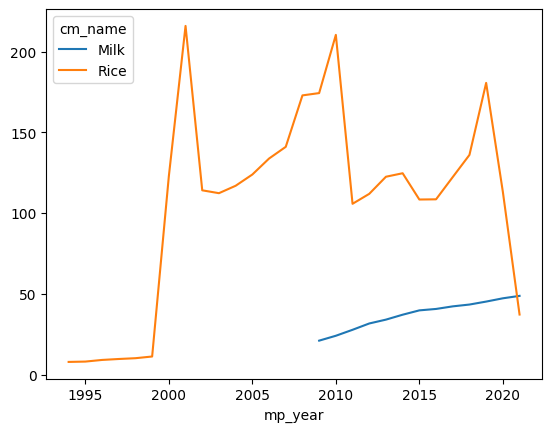

In [252]:
d[['Milk','Rice']].plot()

Як бачите, ціни на рис в Індії нестабільні та мають коливання кожні десять років. Ціни на молоко зростають з кожним роком.

Давайте зробимо те саме для України:

In [253]:
d = df_stat[df_stat['adm0_name']=='Ukraine'].groupby('mp_year').mean(numeric_only=True)
d

cm_name,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
2014,7.38,5.61,NaN,NaN,44.40,8.25,11.06,NaN
2015,6.50,9.29,NaN,NaN,58.43,10.35,19.13,NaN
2016,6.50,10.24,NaN,NaN,61.82,12.90,15.94,NaN
2017,6.36,12.02,NaN,NaN,76.76,17.00,18.29,NaN


<Axes: xlabel='mp_year'>

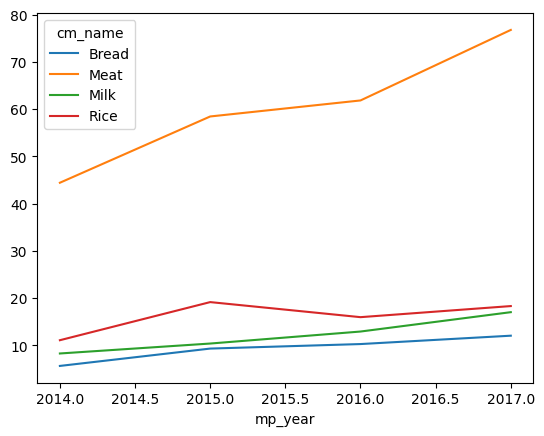

In [254]:
d[['Bread', 'Meat', 'Milk', 'Rice']].plot()

Як бачите найдорожчі ціни на м'ясо. Коливань цін не спостерігається. Також видно, що з кожним роком ціни зростають. Причиною може бути інфляція.

Подивимося на динаміку цін на рис у Китаї:

In [255]:
d = df_stat[df_stat['adm0_name']=='China'].groupby('mp_year').mean(numeric_only=True)
d

cm_name,mp_month,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
mp_year,,,,,,,,
2014,6.50,NaN,NaN,NaN,NaN,NaN,4.33,NaN
2015,6.50,NaN,NaN,NaN,NaN,NaN,4.41,NaN
2016,6.50,NaN,NaN,NaN,NaN,NaN,4.41,NaN
2017,6.50,NaN,NaN,NaN,NaN,NaN,4.45,NaN
2018,6.50,NaN,NaN,NaN,NaN,NaN,4.52,NaN
2019,6.50,NaN,NaN,NaN,NaN,NaN,4.42,NaN
2020,5.50,NaN,NaN,NaN,NaN,NaN,4.10,NaN


<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
d = df_stat[df_stat['adm0_name']=='China'].groupby('mp_year').mean()
d
    </code>
</details>

<Axes: xlabel='mp_year'>

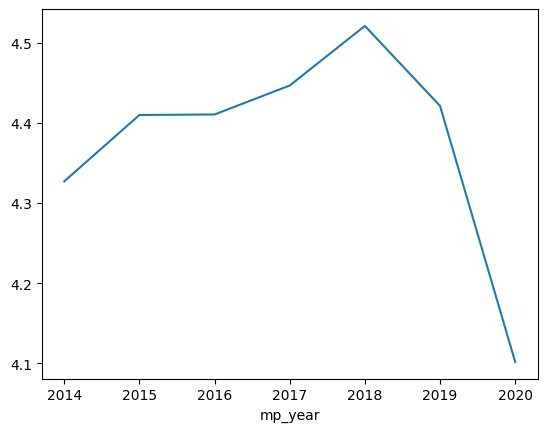

In [256]:
##YOUR CODE GOES HERE##
d['Rice'].plot()

<details><summary>Натисніть <b>тут,</b> щоб отримати розв'язок</summary> 
<code>    
d[['Rice']].plot()
    </code>
</details>

Як бачите, останніми роками ціни падають. Від 4,5 юанів до 4,10 юанів

Давайте досліджуємо середні ціни на різних китайських ринках:

cm_name   mp_year  mp_month  Bread  Exchange rate  Fish  Meat  Milk  Rice  \
mkt_name                                                                    
Hangzhou  2016.93      6.38    NaN            NaN   NaN   NaN   NaN  4.25   
Hubei     2016.93      6.38    NaN            NaN   NaN   NaN   NaN  4.01   
Jiujiang  2016.93      6.38    NaN            NaN   NaN   NaN   NaN  4.12   
Wuhan     2016.93      6.38    NaN            NaN   NaN   NaN   NaN  4.66   
Yuncheng  2016.93      6.38    NaN            NaN   NaN   NaN   NaN  4.88   

cm_name   Water  
mkt_name         
Hangzhou    NaN  
Hubei       NaN  
Jiujiang    NaN  
Wuhan       NaN  
Yuncheng    NaN  


<Axes: xlabel='mkt_name'>

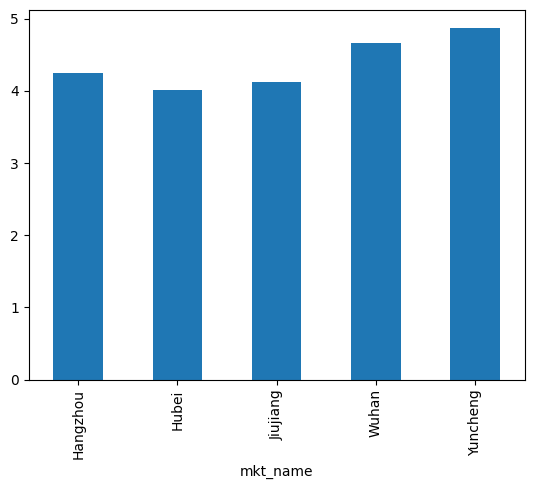

In [257]:
d = df_stat[df_stat['adm0_name']=='China'].groupby(['mkt_name']).mean(numeric_only=True)
print(d)
d['Rice'].plot.bar()

Як бачите, Yuncheng – найдорожчий ринок, Hubei – найдешевший.

Ви також можете побудувати його за допомогою кругової діаграми:

<Axes: ylabel='Rice'>

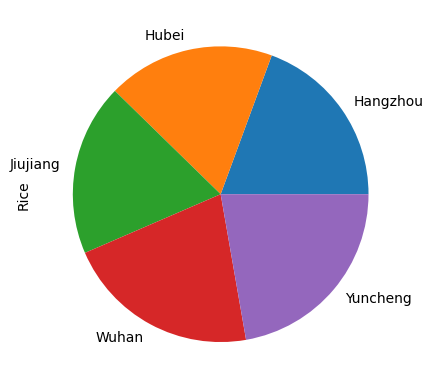

In [258]:
d['Rice'].plot.pie()

Також ми можемо досліджувати, як змінювалася структура ринкових цін за роками:

mkt_name  Hangzhou  Hubei  Jiujiang  Wuhan  Yuncheng
mp_year                                             
2014          4.31   3.90      4.17   4.50      4.75
2015          4.38   3.95      4.20   4.69      4.84
2016          4.14   4.11      4.17   4.80      4.82
2017          4.22   4.22      4.17   4.79      4.84
2018          4.33   4.10      4.07   4.83      5.27
2019          4.16   3.96      4.09   4.66      5.23
2020          4.19   3.80      3.95   4.29      4.28


<Axes: xlabel='mp_year'>

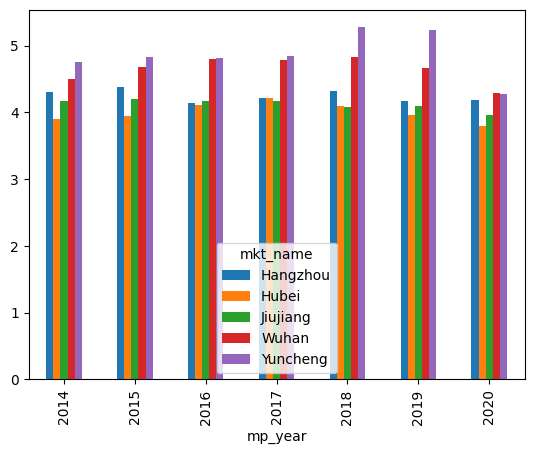

In [259]:
d = df_stat[df_stat['adm0_name']=='China']
d = d[['mkt_name', 'mp_year', 'Rice']]
d = pd.pivot_table(d, values= 'Rice', index= ['mp_year'], columns='mkt_name', aggfunc='mean', margins=False)
print(d)
d.plot.bar()

Порівняємо ринкові ціни різних країн.

Як згадувалося раніше, набір даних включає країни, де національною валютою є долари США. Подивимося на них:

In [260]:
usd_countries = list((df[(df['cur_name']=='USD')])['adm0_name'].unique())
usd_countries

['Costa Rica',
 'Ecuador',
 'El Salvador',
 'Honduras',
 'Nicaragua',
 'Panama',
 'Timor-Leste']

Для цих країн поле "Exchange rate" порожнє. Тому для порівняння цін нам потрібно змінити значення цього стовпця на одиницю:

In [261]:
df_stat.loc[:, 'Exchange rate'] = df_stat.apply(lambda x : 1 if x['adm0_name'] in usd_countries else x['Exchange rate'], axis=1 )

Перед розрахунком цін у доларах США ми видаляємо всі рядки, що містять порожні значення у стовпці «Exchange rate», використовуючи **[pandas.DataFrame.dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)**:

In [262]:
df_stat_multy = df_stat[df_stat['Exchange rate'].notna()]
df_stat_multy

cm_name,adm0_name,mp_year,mp_month,mkt_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water
1039,Afghanistan,2014,2,Fayzabad,50.00,57.55,NaN,NaN,NaN,50.00,NaN
1040,Afghanistan,2014,2,Hirat,29.40,57.65,NaN,NaN,NaN,25.40,NaN
1041,Afghanistan,2014,2,Jalalabad,33.30,57.70,NaN,NaN,NaN,48.38,NaN
1042,Afghanistan,2014,2,Kabul,38.50,57.67,NaN,NaN,NaN,50.00,NaN
1043,Afghanistan,2014,2,Kandahar,37.00,58.25,NaN,NaN,NaN,24.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...
164739,Yemen,2021,6,Sana'a City,NaN,595.67,NaN,NaN,NaN,1000.00,NaN
164740,Yemen,2021,6,Sayoun City,NaN,933.93,NaN,NaN,NaN,1000.00,NaN
164741,Yemen,2021,6,Soqatra (Hudaibo),NaN,932.00,NaN,NaN,NaN,1100.00,NaN
164742,Yemen,2021,6,Taiz City,NaN,929.48,NaN,NaN,NaN,1375.00,NaN


Давайте отримаємо список країн, де був відомий обмінний курс:

In [263]:
df_stat_multy["adm0_name"].value_counts().to_frame()

,count
adm0_name,
Democratic Republic of the Congo,1991
Syrian Arab Republic,1986
El Salvador,1594
Yemen,1419
Somalia,1284
Afghanistan,1070
Liberia,1024
Ecuador,864
Nicaragua,683


In [264]:
len(df_stat_multy["adm0_name"].value_counts())

23

Як бачите, залишилося лише 23 країни. Перерахуємо ціни на рис у доларах США

In [265]:
df_stat_multy['Rice_USD'] = df_stat_multy['Rice'] / df_stat_multy['Exchange rate']
df_stat_multy

cm_name,adm0_name,mp_year,mp_month,mkt_name,Bread,Exchange rate,Fish,Meat,Milk,Rice,Water,Rice_USD
1039,Afghanistan,2014,2,Fayzabad,50.00,57.55,NaN,NaN,NaN,50.00,NaN,0.87
1040,Afghanistan,2014,2,Hirat,29.40,57.65,NaN,NaN,NaN,25.40,NaN,0.44
1041,Afghanistan,2014,2,Jalalabad,33.30,57.70,NaN,NaN,NaN,48.38,NaN,0.84
1042,Afghanistan,2014,2,Kabul,38.50,57.67,NaN,NaN,NaN,50.00,NaN,0.87
1043,Afghanistan,2014,2,Kandahar,37.00,58.25,NaN,NaN,NaN,24.38,NaN,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...
164739,Yemen,2021,6,Sana'a City,NaN,595.67,NaN,NaN,NaN,1000.00,NaN,1.68
164740,Yemen,2021,6,Sayoun City,NaN,933.93,NaN,NaN,NaN,1000.00,NaN,1.07
164741,Yemen,2021,6,Soqatra (Hudaibo),NaN,932.00,NaN,NaN,NaN,1100.00,NaN,1.18
164742,Yemen,2021,6,Taiz City,NaN,929.48,NaN,NaN,NaN,1375.00,NaN,1.48


Потім ми можемо порівняти динаміку цін на рис у різних країнах:

In [266]:
df_stat_multy = pd.pivot_table(df_stat_multy, values= 'Rice_USD', index= ['mp_year'], columns='adm0_name', aggfunc='mean', margins=False)
df_stat_multy

adm0_name,Afghanistan,Costa Rica,Democratic Republic of the Congo,Ecuador,El Salvador,Ethiopia,Honduras,Iraq,Liberia,Nicaragua,Panama,Somalia,South Sudan,Syrian Arab Republic,Tajikistan,Timor-Leste,Yemen
mp_year,,,,,,,,,,,,,,,,,
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,0.59,26.97,NaN,NaN,NaN,NaN,418.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,0.55,26.13,NaN,NaN,NaN,NaN,459.44,13.96,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,711.67,NaN,0.62,29.42,NaN,585.39,NaN,NaN,537.04,200.94,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,847.75,NaN,0.81,45.14,NaN,889.00,NaN,NaN,850.80,490.62,NaN,NaN,NaN,NaN,0.74,NaN


In [267]:
len(df_stat_multy.columns)

17

Як бачите, лише 17 країн із 23 містять інформацію про ціну на рис.

Порівняємо динаміку цін для Конго, Сомалі, Таджикистану та Еквадору.

In [268]:
df_stat_multy = df_stat_multy[['Democratic Republic of the Congo','Somalia', 'Tajikistan', 'Ecuador']]

<Axes: xlabel='mp_year'>

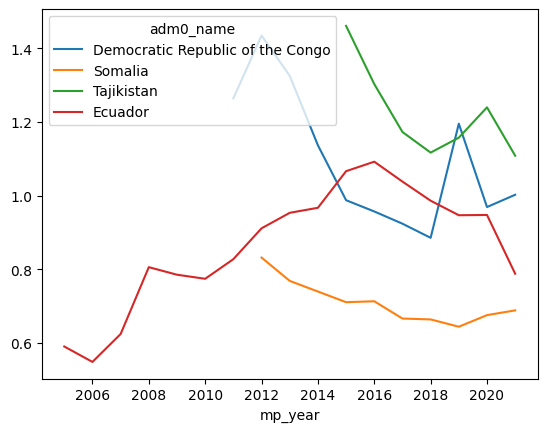

In [269]:
df_stat_multy.plot()

### Лінія тренду

Давайте порахуємо тренд ціни на рис для вказаних країн. Для цього ми маємо:
1. Вилучити тимчасовий ряд з DataFrame для досліджуваної країни.
2. Відкинути значення NaN
3. Вилучити значення **x** (року) та **y** (ціна на рис) з часового ряду і перетворити їх на вектор.
4. Створити **[sklearn.linear_model.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)** модель
5. Підігнати модель за значеннями **x** та **y**
6. Побудувати прогноз на наступні 3 роки
7. Відобразити результат на графіку

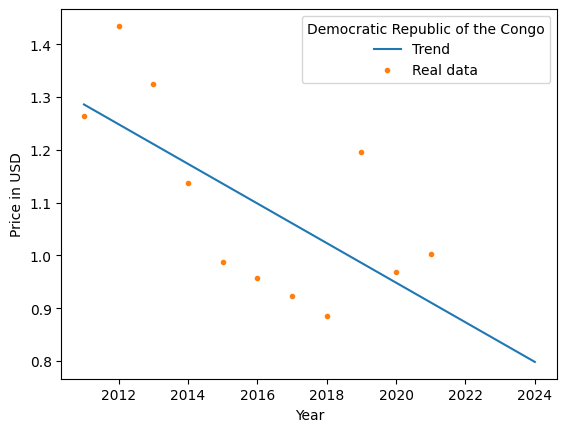

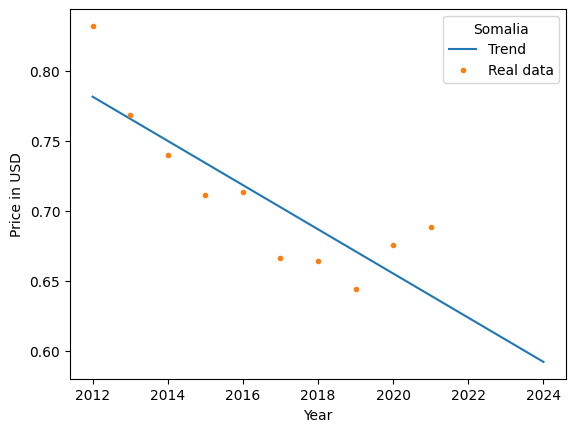

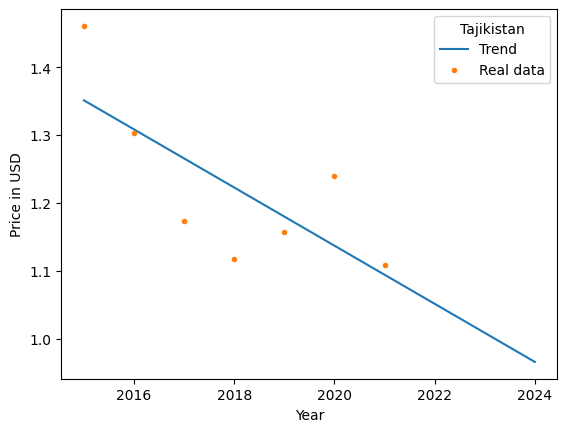

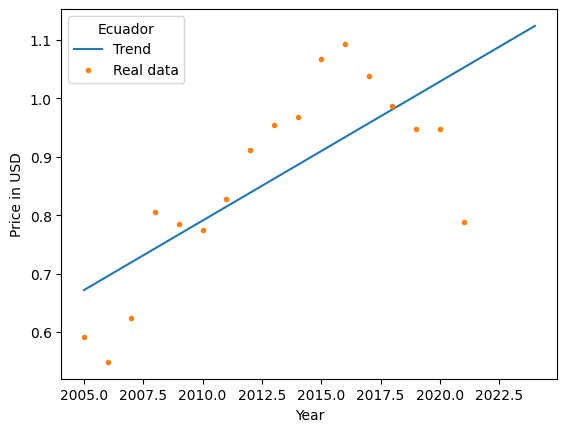

In [270]:
for c in df_stat_multy.columns:
    y = df_stat_multy[c].dropna()
    x = y.index
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    x = np.reshape(x, (-1, 1)) # transform X values
    y = np.reshape(y.values, (-1, 1)) # transform Y values
    model.fit(x, y)
    X_pred= np.append(x, [2022, 2023, 2024])
    X_pred = np.reshape(X_pred, (-1, 1))
    # calculate trend
    trend = model.predict(X_pred)
    plt.figure()
    plt.plot(X_pred, trend, "-", label='Trend')
    plt.plot(x, y, ".", label='Real data')
    plt.xlabel('Year')
    plt.ylabel('Price in USD')
    plt.legend(title=c)
    plt.show()

Як видно з рисунків, лінійна модель не є точною, але дає змогу розрахувати основний тренд цін. Для кращого прогнозування слід використовувати різні підходи. Це буде показано у наступних лабораторних роботах.

## Висновки

Як показує практика, дані, отримані у реальних натурних експериментах, не придатні для прямої статистичної обробки. Тому в цій лабораторній роботі ми вивчили основні методи завантаження та попередньої підготовки даних. Ми вивчили, як завантажувати, перетворювати, групувати, перераховувати та візуалізувати дані.
На відміну від добре відомих класичних підходів до статистичного аналізу даних, Python містить безліч потужних бібліотек, що дозволяють легко та швидко маніпулювати даними. Тому ми вивчили основні методи автоматизації з бібліотеки Pandas для попередньої підготовки та статистичного аналізу даних. Також ми вивчили основні методи візуалізації даних за допомогою бібліотеки MatplotLib, яка містить ефективні засоби візуального аналізу даних.

## Завдання

1. Оберіть дані, де виконується умова вашого варінту і 
виведіть загальну кількість даних згідно проміжку з вашого варіанту:
- 2000 < mp_year < 2015

Орієнтовний вид фінальної таблиці нижче

In [271]:
df = pd.read_csv('global_food_prices.csv')

In [272]:
df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [273]:
# Koef
unit_conversion = {
    'KG': 1, 'Unit': 1, 'Pound': 0.45, '400 G': 0.4, '150 G': 0.15, '5 pcs': 1,
    '500 G': 0.5, '700 G': 0.7, '800 G': 0.8, '1.1 KG': 1.1, 'Libra': 0.45,
    '900 G': 0.9, '100 KG': 100, '46 KG': 46, 'Cuartilla': 2.88, '90 KG': 90,
    '120 KG': 120, '50 KG': 50, 'MT': 1000, '45 KG': 45, '84 KG': 84,
    '100 Pounds': 45, 'Marmite': 1, '5 KG': 5, '10 KG': 10, '1.4 KG': 1.4,
    '25 KG': 25, '2 KG': 2, 'Loaf': 1, '50 Pounds': 22.5, '380 G': 0.38,
    '500 ML': 0.5, '385 G': 0.385, '0.8 KG': 0.8, '200 ML': 0.2, '20 G': 0.02,
    '1.8 KG': 1.8, '125 G': 0.125, '20 KG': 20, '170 G': 0.17, '185 G': 0.185,
    '200 G': 0.2, '1.5 KG': 1.5, '1.2 KG': 1.2, 'Bundle': 46, '160 G': 0.16,
    'Cubic meter': 1, '1.5 L': 1.5, 'L': 1, 'USD/LCU': 1
}

df['um_koef'] = df['um_name'].map(unit_conversion)
df['mp_price_un'] = df['mp_price'] / df['um_koef']

In [274]:
# Get countries that use USD as their official currency
usd_countries = df[df['cur_name'] == 'USD']['adm0_name'].unique()

# Set Exchange rate = 1 for countries using USD
df['Exchange rate'] = np.where(df['adm0_name'].isin(usd_countries), 1, np.nan)

# Extract exchange rate data from rows where commodity name is "Exchange rate"
exchange_data = df[df['cm_name'] == 'Exchange rate']
# Calculate the average exchange rate per country
exchange_rates = exchange_data.groupby('adm0_name')['mp_price_un'].mean()

# Fill in Exchange rate for other countries using the average exchange rate
df['Exchange rate'] = df.apply(
    lambda row: exchange_rates[row['adm0_name']] if pd.isna(row['Exchange rate']) and row['adm0_name'] in exchange_rates else row['Exchange rate'],
    axis=1
)

# Drop rows where Exchange rate is still missing
df = df[df['Exchange rate'].notna()]

# Convert prices to USD
df['mp_price_usd'] = df['mp_price_un'] / df['Exchange rate']

In [275]:
filtered_df = df[(df['mp_year'] > 2000) & (df['mp_year'] < 2015)]
print(f"Number of records in the range (2000, 2015): {len(filtered_df)}")

Number of records in the range (2000, 2015): 17575


2. Перевірте чи поле mp_price даних є добре розпреділеними за допомогою гістограм.
Зробіть гістограми надто детальні і ті, які містять недостатньо інформації.
Підберіть найкращу кількість bins для гістограм.

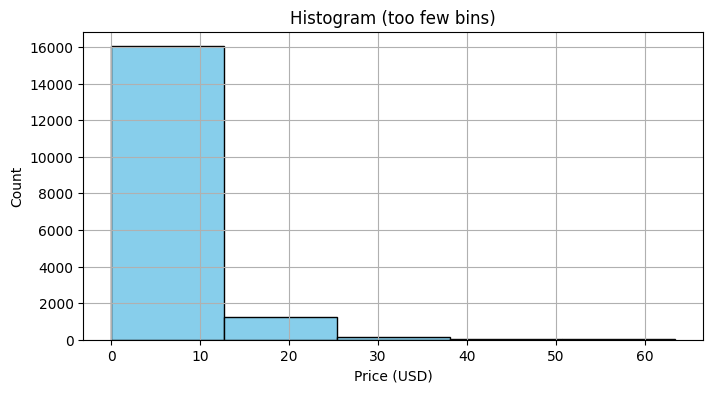

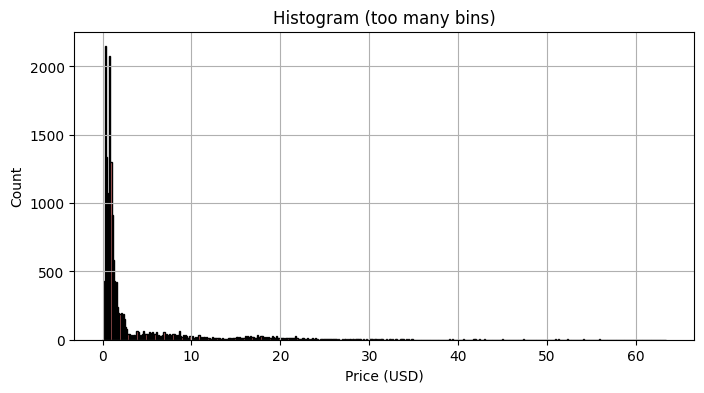

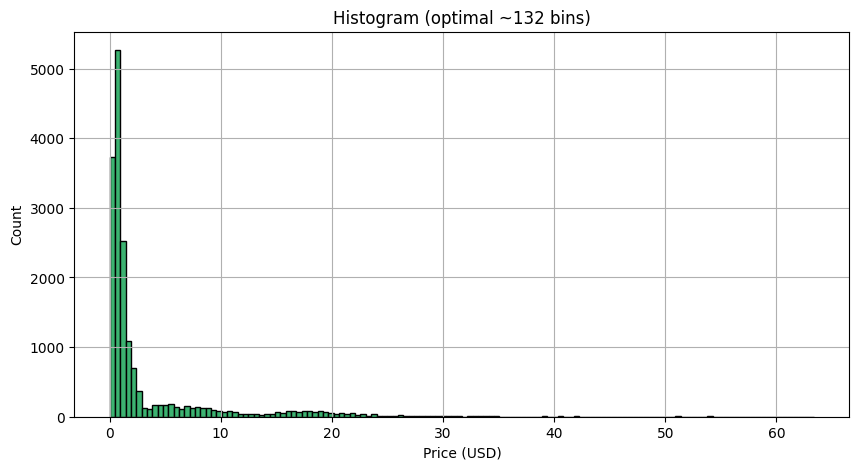

In [276]:
# Too few bins
plt.figure(figsize=(8, 4))
plt.hist(filtered_df['mp_price_usd'], bins=5, color='skyblue', edgecolor='black')
plt.title("Histogram (too few bins)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Too many bins
plt.figure(figsize=(8, 4))
plt.hist(filtered_df['mp_price_usd'], bins=500, color='lightcoral', edgecolor='black')
plt.title("Histogram (too many bins)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Optimal number of bins
import math
bins_opt = int(math.sqrt(len(filtered_df)))
plt.figure(figsize=(10, 5))
plt.hist(filtered_df['mp_price_usd'], bins=bins_opt, color='mediumseagreen', edgecolor='black')
plt.title(f"Histogram (optimal ~{bins_opt} bins)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

3. Побудуйте scatter plots по полях mp_year і mp_price.

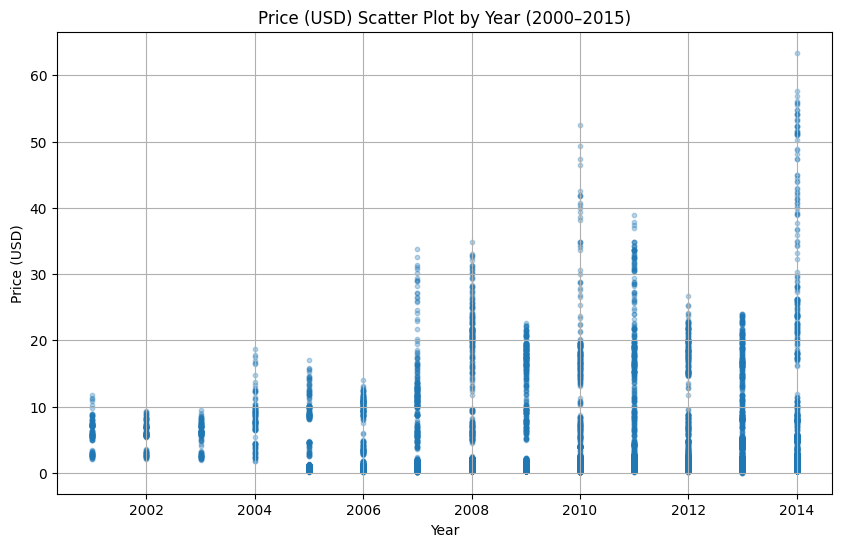

In [277]:
plt.figure(figsize=(10, 6))
# Scatter plot of prices in USD by year
plt.scatter(filtered_df['mp_year'], filtered_df['mp_price_usd'], alpha=0.3, s=10)
plt.title('Price (USD) Scatter Plot by Year (2000–2015)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

4. Згрупуйте дані згідно критеріїв вашого варіанту і збережіть результат в нову колонку даних. Побудуйте таблицю, як в прикладі нижче. Друге поле даних,
яке ви будете розглядати - pt_name. Можна застосувати crosstab.
- mp_year <= 2000, 2000 < mp_year < 2015, mp_year >= 2015


In [278]:
# Create a new column with year groups
def categorize_year(year):
    if year <= 2000:
        return 'Before 2000'
    elif year < 2015:
        return '2001–2014'
    else:
        return 'After 2015'

df['mp_year_group'] = df['mp_year'].apply(categorize_year)

# Check the results
print(df[['mp_year', 'mp_year_group']])

# Build a crosstab with pt_name
ct = pd.crosstab(df['mp_year_group'], df['pt_name'])
print(ct)

         mp_year mp_year_group
450367      2007     2001–2014
450368      2007     2001–2014
450369      2007     2001–2014
450370      2007     2001–2014
450371      2008     2001–2014
...          ...           ...
2050633     2021    After 2015
2050634     2021    After 2015
2050635     2021    After 2015
2050636     2021    After 2015
2050637     2021    After 2015

[37299 rows x 2 columns]
pt_name        Retail  Wholesale
mp_year_group                   
2001–2014        5468      12107
After 2015      14519       5124
Before 2000         0         81


5. Знайдіть максимальне, мінімальне, середнє, популярне, дисперсію випадкової величини, верхню і нижню квартілі значення поля mp_year.


In [279]:
df['mp_year'].describe()
df['mp_year'].std()

np.float64(4.943047456009071)

6. Вирішіть проблему пропущених значень одним із способом на ваш вибір:
- adm0_name
- adm1_name
- cm_name
- mkt_name
- pt_name

In [280]:
print(df.columns)

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource',
       'um_koef', 'mp_price_un', 'Exchange rate', 'mp_price_usd',
       'mp_year_group'],
      dtype='object')


In [281]:
# Define the columns to check for missing values
columns_to_check = ['adm0_name', 'adm1_name', 'cm_name', 'mkt_name', 'pt_name']

# Count missing values in the selected columns
missing_info = df[columns_to_check].isna().sum()

# Print the number of missing values
print("Number of missing values:\n", missing_info)

Number of missing values:
 adm0_name        0
adm1_name    20385
cm_name          0
mkt_name         0
pt_name          0
dtype: int64


In [282]:
# Заповнюємо пропущені значення в колонці adm1_name словом 'Unknown'
df['adm1_name'] = df['adm1_name'].fillna('Unknown')

In [283]:
# Check that there are no missing values left
print("Remaining missing values in adm1_name:", df['adm1_name'].isna().sum())

# Check the most frequent values (including 'Unknown')
print("\nMost frequent values in adm1_name:")
print(df['adm1_name'].value_counts().head())

Remaining missing values in adm1_name: 0

Most frequent values in adm1_name:
adm1_name
Unknown               20385
Masvingo               1864
Matabeleland South     1537
Pichincha              1476
Midlands               1466
Name: count, dtype: int64


7. Текстові змінні не можуть використовуватися в подальшому для побудови регресій чи інших 
математичних моделей. Є кілька способів подолати цю проблему. Перший спосіб - присвоїти відповідні
числові значення - від 1 до n. Другий підхід - використати даміс змінні. Застосуйте один з
цих підходів для свого варіанту:
- adm0_name
- adm1_name
- cm_name
- mkt_name
- pt_name

In [284]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original df
df_encoded = df.copy()

# Columns to encode
columns_to_encode = ['adm0_name', 'adm1_name', 'cm_name', 'mkt_name', 'pt_name']

df_encoded[columns_to_encode] = df_encoded[columns_to_encode].apply(LabelEncoder().fit_transform)

In [285]:
# Display label mappings for each encoded column
for col in columns_to_encode:
    if col in label_encoders:
        le = label_encoders[col]
        label_map = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\nCodes for '{col}':")
        for k, v in label_map.items():
            print(f"{v}: {k}")


Codes for 'adm0_name':
0: Costa Rica
1: Ecuador
2: El Salvador
3: Honduras
4: Nicaragua
5: Panama
6: Timor-Leste
7: Zimbabwe

Codes for 'adm1_name':
0: Azuay
1: Baucau
2: Bobonaro
3: Bulawayo
4: Chimborazo
5: Dili
6: Guayas
7: Harare
8: Manabi
9: Manicaland
10: Mashonaland Central
11: Mashonaland East
12: Mashonaland West
13: Masvingo
14: Matabeleland North
15: Matabeleland South
16: Midlands
17: Oecussi
18: Pichincha
19: Tungurahua
20: Unknown

Codes for 'cm_name':
0: Apples - Wholesale
1: Avocados - Wholesale
2: Bananas - Wholesale
3: Beans (black) - Wholesale
4: Beans (cranberry) - Retail
5: Beans (cranberry) - Wholesale
6: Beans (dry) - Wholesale
7: Beans (kidney) - Retail
8: Beans (kidney, pinto) - Wholesale
9: Beans (pod) - Wholesale
10: Beans (red) - Retail
11: Beans (red) - Wholesale
12: Beans (silk red) - Retail
13: Beans (silk red) - Wholesale
14: Beans (sugar) - Retail
15: Beans (sugar, biofortified) - Retail
16: Beans (white) - Wholesale
17: Beans - Retail
18: Beetroots - 

8. Побудуйте scatter plot змінних - mp_year vs:
- adm0_name
- adm1_name
- cm_name
- mkt_name
- pt_name

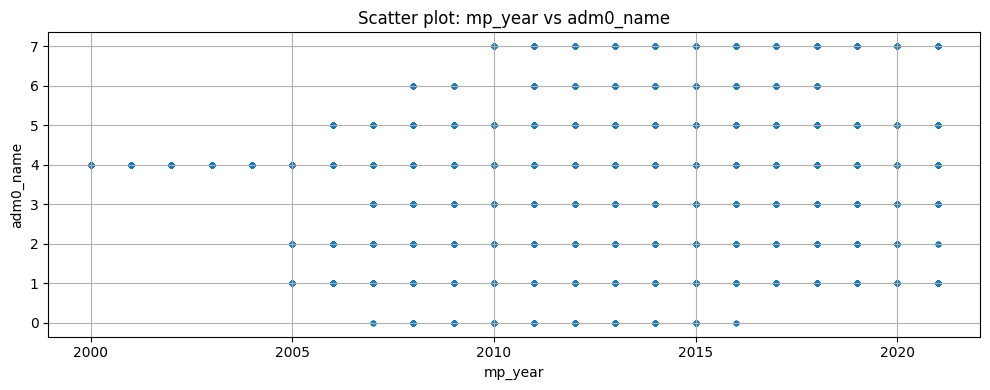

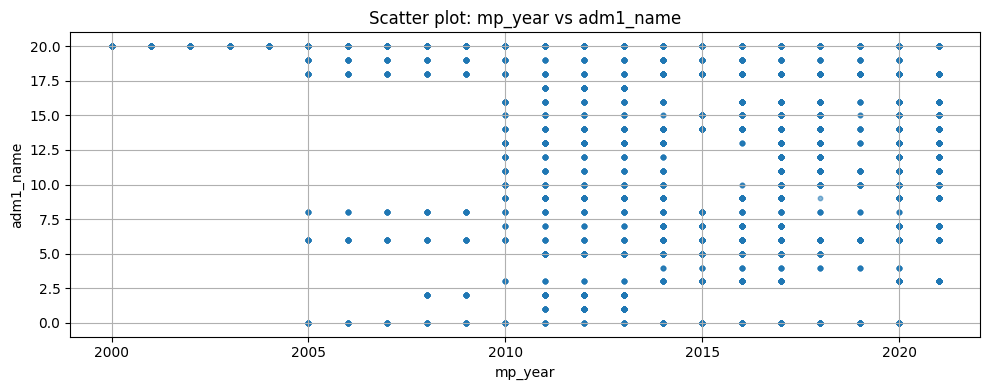

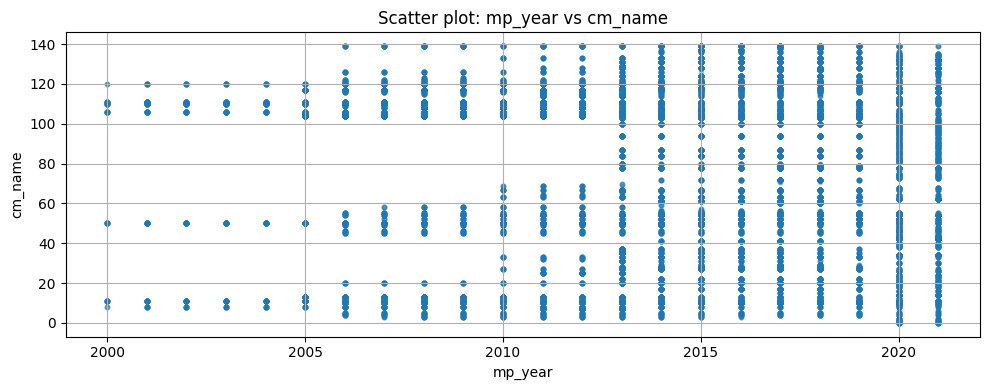

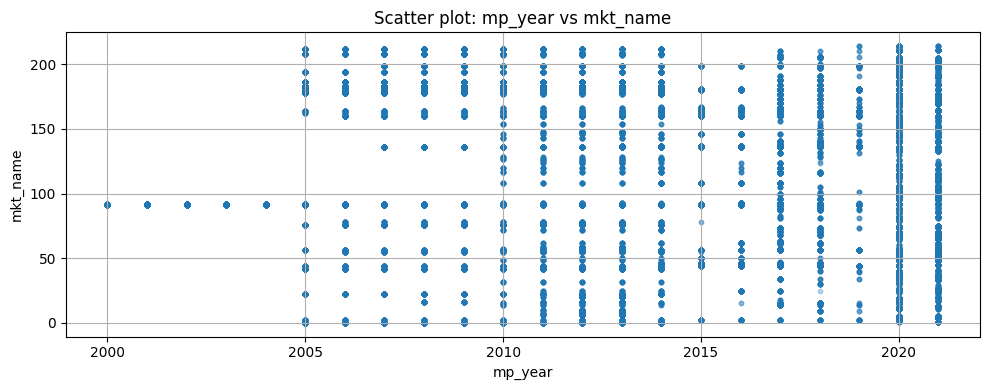

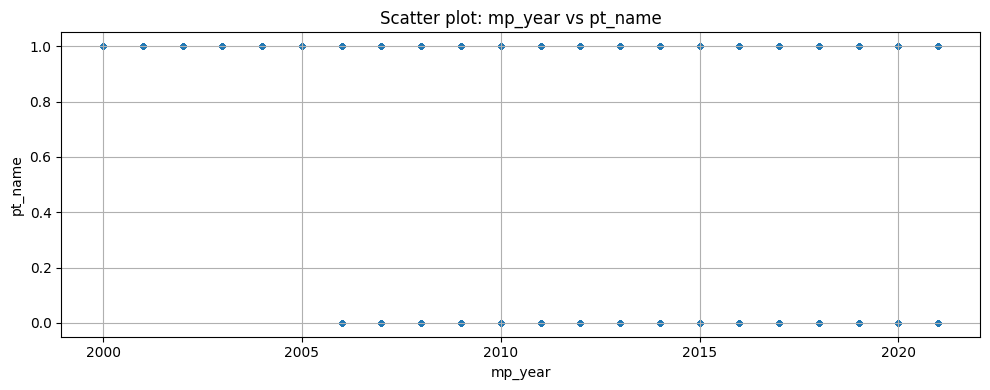

In [286]:
# All relevant encoded variables
encoded_columns = ['adm0_name', 'adm1_name', 'cm_name', 'mkt_name', 'pt_name']

# Generate scatter plots for each encoded variable against mp_year
for col in encoded_columns:
    plt.figure(figsize=(10, 4))
    plt.scatter(df_encoded['mp_year'], df_encoded[col], alpha=0.3, s=10)
    plt.title(f'Scatter plot: mp_year vs {col}')
    plt.xlabel('mp_year')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


9. Створіть нову колонку у даних, значення якої обчислюється log від mp_year.

In [287]:
# Create a new column with the logarithm of mp_year
df_encoded['log_mp_year'] = np.log(df_encoded['mp_year'])

# Check the result
print(df_encoded[['mp_year', 'log_mp_year']].head())

        mp_year  log_mp_year
450367     2007         7.60
450368     2007         7.60
450369     2007         7.60
450370     2007         7.60
450371     2008         7.60


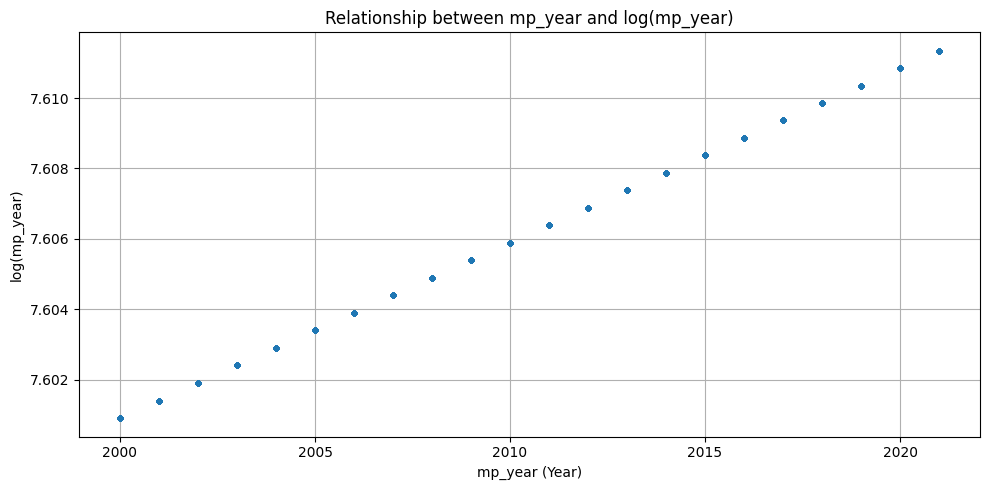

In [288]:
# Plot the relationship between mp_year and its logarithm
plt.figure(figsize=(10, 5))
plt.plot(df_encoded['mp_year'], df_encoded['log_mp_year'], '.', alpha=0.5)
plt.title('Relationship between mp_year and log(mp_year)')
plt.xlabel('mp_year (Year)')
plt.ylabel('log(mp_year)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Автори

Розробник: [Yaroslav Vyklyuk, prof., PhD., DrSc](http://vyklyuk.bukuniver.edu.ua/en/)

Консультант з роздрібної торгівлі: [Olha Vdovichena, ass. prof, PhD](https://scholar.google.ru/citations?user=3vIQ33YAAAAJ&hl=uk)

 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).